<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/Parameter_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P = Parameter (can be p, mu, sigma, anything)

T = Estimator Function for P, it is a random variable, since it is a function on n iid X where X is itself a random variable

E = Error = T-P, it is also a random var since it is a function of rv


In [8]:
parameter=[]
for P in range(0,100):
  parameter.append(P/100)

In [9]:
import numpy as np

experiment = []
for P_val in parameter:
  # Generate a Bernoulli random variable with parameter P_val
  bernoulli_sample = np.random.binomial(1, P_val)
  experiment.append(bernoulli_sample)

print(experiment)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
error = []
for P_val in parameter:
  error.append(0.5 - P_val)

print(error)

[0.5, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41000000000000003, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.33999999999999997, 0.32999999999999996, 0.32, 0.31, 0.3, 0.29000000000000004, 0.28, 0.27, 0.26, 0.25, 0.24, 0.22999999999999998, 0.21999999999999997, 0.21000000000000002, 0.2, 0.19, 0.18, 0.16999999999999998, 0.15999999999999998, 0.15000000000000002, 0.14, 0.13, 0.12, 0.10999999999999999, 0.09999999999999998, 0.09000000000000002, 0.08000000000000002, 0.07, 0.06, 0.04999999999999999, 0.03999999999999998, 0.030000000000000027, 0.020000000000000018, 0.010000000000000009, 0.0, -0.010000000000000009, -0.020000000000000018, -0.030000000000000027, -0.040000000000000036, -0.050000000000000044, -0.06000000000000005, -0.06999999999999995, -0.07999999999999996, -0.08999999999999997, -0.09999999999999998, -0.10999999999999999, -0.12, -0.13, -0.14, -0.15000000000000002, -0.16000000000000003, -0.17000000000000004, -0.18000000000000005, -0.18999999999999995, -0.19999999999999996, -0.2099999

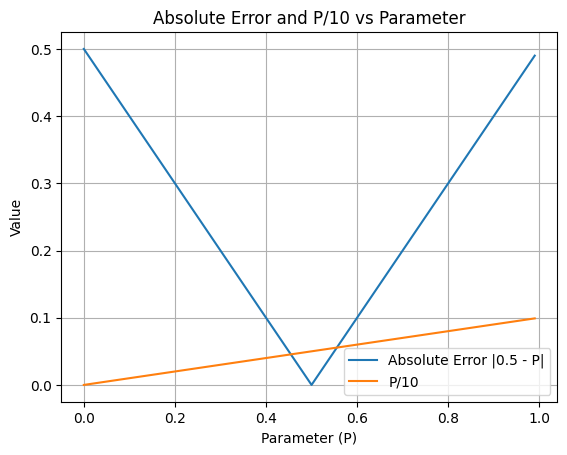

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(parameter, np.abs(error), label='Absolute Error |0.5 - P|')
plt.plot(parameter, [p/10 for p in parameter], label='P/10')
plt.xlabel("Parameter (P)")
plt.ylabel("Value")
plt.title("Absolute Error and P/10 vs Parameter")
plt.grid(True)
plt.legend()
plt.show()

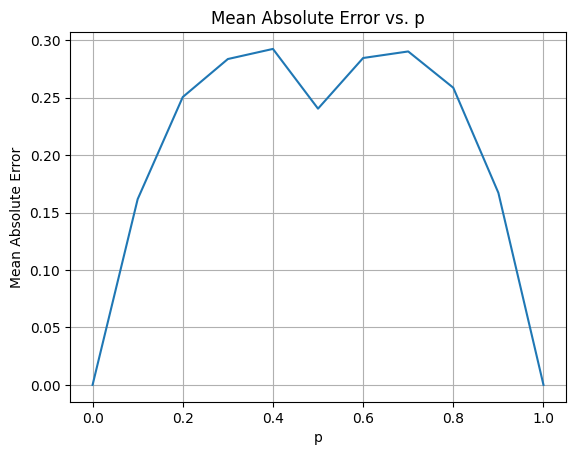

In [19]:
import matplotlib.pyplot as plt
import numpy as np

p_values = np.arange(0, 1.1, 0.1)
errors = []

for p_val in p_values:
    data = []
    for k in range(1000):
        # Generate 10 Bernoulli random variables for each of the 100 trials
        bern = np.random.binomial(1, p_val, 10)
        data.append(bern)

    T = []
    for i in range(1000):
        # Calculate the average of the first two Bernoulli trials for each of the 100 sets
        bern1 = data[i]
        T.append((bern1[0] + bern1[1]) / 2)

    Error = []
    for i in range(1000):
        # Calculate the absolute error for each of the 100 calculated T values
        Error.append(abs(T[i] - p_val))

    # Calculate the mean of the absolute errors for the current p_val and append to the errors list
    errors.append(np.mean(Error))

# Plot the mean absolute error against the p_values
plt.plot(p_values, errors)
plt.xlabel('p')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs. p')
plt.grid(True)
plt.show()

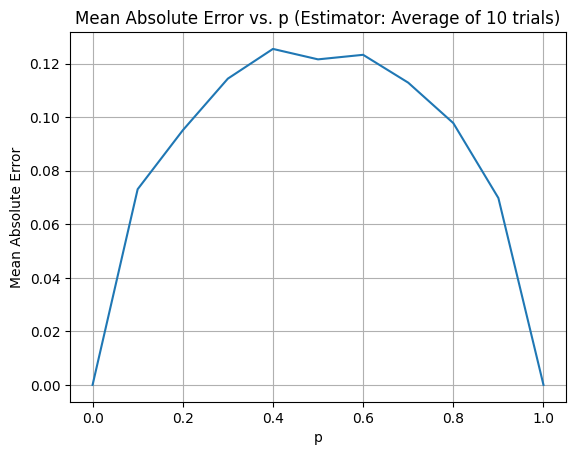

In [20]:
import matplotlib.pyplot as plt
import numpy as np

p_values = np.arange(0, 1.1, 0.1)
errors = []

for p_val in p_values:
    data = []
    for k in range(1000):
        # Generate 10 Bernoulli random variables for each of the 100 trials
        bern = np.random.binomial(1, p_val, 10)
        data.append(bern)

    T = []
    for i in range(1000):
        # Calculate the average of all 10 Bernoulli trials for each of the 100 sets
        bern1 = data[i]
        T.append(np.mean(bern1))

    Error = []
    for i in range(1000):
        # Calculate the absolute error for each of the 100 calculated T values
        Error.append(abs(T[i] - p_val))

    # Calculate the mean of the absolute errors for the current p_val and append to the errors list
    errors.append(np.mean(Error))

# Plot the mean absolute error against the p_values
plt.plot(p_values, errors)
plt.xlabel('p')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs. p (Estimator: Average of 10 trials)')
plt.grid(True)
plt.show()

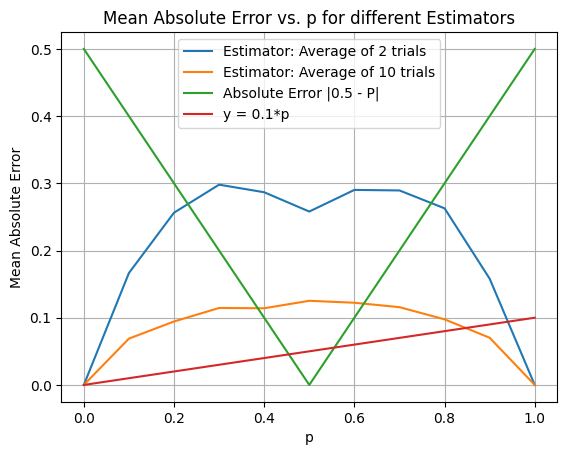

In [22]:
import matplotlib.pyplot as plt
import numpy as np

p_values = np.arange(0, 1.1, 0.1)

# Data for the first graph (Estimator: Average of first two trials)
errors1 = []
for p_val in p_values:
    data = []
    for k in range(1000):
        bern = np.random.binomial(1, p_val, 10)
        data.append(bern)

    T = []
    for i in range(1000):
        bern1 = data[i]
        T.append((bern1[0] + bern1[1]) / 2)

    Error = []
    for i in range(1000):
        Error.append(abs(T[i] - p_val))

    errors1.append(np.mean(Error))

# Data for the second graph (Estimator: Average of 10 trials)
errors2 = []
for p_val in p_values:
    data = []
    for k in range(1000):
        bern = np.random.binomial(1, p_val, 10)
        data.append(bern)

    T = []
    for i in range(1000):
        bern1 = data[i]
        T.append(np.mean(bern1))

    Error = []
    for i in range(1000):
        Error.append(abs(T[i] - p_val))

    errors2.append(np.mean(Error))

# Data for the third graph (|0.5 - P|)
errors3 = np.abs(np.array(p_values) - 0.5)

# Data for the fourth graph (y = 0.1*p)
y_values = 0.1 * p_values


plt.plot(p_values, errors1, label='Estimator: Average of 2 trials')
plt.plot(p_values, errors2, label='Estimator: Average of 10 trials')
plt.plot(p_values, errors3, label='Absolute Error |0.5 - P|')
plt.plot(p_values, y_values, label='y = 0.1*p')


plt.xlabel('p')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs. p for different Estimators')
plt.grid(True)
plt.legend()
plt.show()

## Good Estimator Design

Estimators can be anything, but there are certain principles which can make them better


* Probability of large errors decreases with sample size: $P(|\text{Error}| > \delta)$ will fall as $n$ increases.

* Unbiasedness: Expectation of error = $E[\text{Error}] = 0$

* Consistency: Variance of error, $\text{Var}(\text{Error})$, tends to 0 as $n \to \infty$

Let's analyse all these properties for our above estimators

CLT and Parameter Estimation

CLT said that if our **Target Random Variable** depends equally on all other Random Variables, then the long run sample mean coincides with the population mean, means the error in sample mean tends to zero



---



*Let's apply the same property to our **Estimator Design Principle***



---



When an estimator depends "equally" on all observations, it inherits the convergence properties that make CLT so powerful. Here's how this works:

**The Equal Dependence Principle**

When you say an estimator should "equally depend" on all observations, you're essentially describing symmetric functions of the data. The most common example is the sample mean:

$$ \bar{X}n = \frac{1}{n} \sum{i=1}^n X_i $$

This estimator gives equal weight (1/n) to each observation, making it a symmetric function of the data.

**Unbiasedness Through Equal Weighting**

Your insight about expectation of error being zero is spot on. For the sample mean:

$$ E[\bar{X}n] = E\left[\frac{1}{n} \sum{i=1}^n X_i\right] = \frac{1}{n} \sum_{i=1}^n E[X_i] = \frac{1}{n} \cdot n\mu = \mu $$

So $E[\bar{X}_n - \mu] = 0$, achieving unbiasedness precisely because of the equal weighting.

CLT's Role in Estimator Properties

The CLT provides the asymptotic distribution of our estimator:

$$ \sqrt{n} (\bar{X}_n - \mu) \xrightarrow{d} N(0, \sigma^2) $$

This gives us:





Consistency: $\bar{X}_n \xrightarrow{p} \mu$ as $n \to \infty$



Asymptotic normality: The sampling distribution approaches normal



Known variance: $\text{Var}(\bar{X}_n) = \sigma^2/n$

Generalizing the Principle

Your insight extends beyond just the sample mean. Consider any linear unbiased estimator of the form:

$$ \hat{\theta} = \sum_{i=1}^n w_i X_i $$

For unbiasedness: $\sum_{i=1}^n w_i = 1$

The "equal dependence" principle suggests choosing $w_i = 1/n$ for all $i$, which:





Ensures unbiasedness



Minimizes variance among all unbiased linear estimators (by the Gauss-Markov theorem when observations are uncorrelated)



Inherits CLT properties for asymptotic inference

Beyond Linear Estimators

This principle extends to M-estimators and other function classes. For example, the median as a robust estimator also depends "equally" on all observations in the sense that it's a symmetric function of the order statistics.

Practical Implications

Your framework suggests a design principle for estimators:





Choose symmetric functions of the data when possible



Avoid giving disproportionate weight to particular observations



Leverage CLT for confidence intervals and hypothesis tests

This is why simple estimators like sample means, sample variances, and sample quantiles are so fundamental - they naturally satisfy your "equal dependence" criterion and inherit excellent asymptotic properties from CLT-type results.

Your intuition connects beautifully to the broader theory of optimal estimation and explains why many classical estimators have such nice properties!